<a href="https://colab.research.google.com/github/OptimusJet/OptimusJet/blob/main/Correlation_EDA_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="background-color:SkyBlue;"> 
Exploratory Data Analysis (EDA) & Correlation 
</h1>

In [ ]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 

<h1 style="color:Tomato;"> The Titanic Dataset </h1>

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.

Dataset is available from kaggle (https://www.kaggle.com/c/titanic/data).

<h1 style="color:Tomato;"> Data Description </h1>


**survival**    (survived:  	0 = No, 1 = Yes)
	
**pclass** 	  (Passenger class:	1 = 1st, 2 = 2nd, 3 = 3rd)
	
**embarked**  (Port of Embarkation:	C = Cherbourg, Q = Queenstown, S = Southampton)
	
**sex** 	  (Gender: male, female)	
	
**Age** 	  (Age in years)
	
**sibsp** 	(# of siblings/spouses aboard the Titanic)

**parch** 	(# of parents/children aboard the Titanic)

**ticket** 	(Ticket number)

**fare** 	(Passenger fare)

**cabin** 	(Cabin number)

In [ ]:
#load data set
titanic=pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/hands-on-exploratory-data-analysis-with-python/master/Chapter%207/titanic.csv")
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# How many rows and columns are there in the data set?
titanic.shape

(891, 12)

In [ ]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# Let's make a copy of the titanic DF
titanic2 = titanic.copy()

<p style="color:Red;">
Let’s take a  look at the number of missing vakues in each column of the data set. Sort the result from most mssing values to the least.</p>

In [ ]:
missing = titanic.isnull().sum().sort_values(ascending=False)
missing

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
#percentage of women who survived
women = titanic.loc[titanic.Sex == 'female']["Survived"]
w_survival_rate = sum(women)/len(women)

#percentage of men survived
men = titanic.loc[titanic.Sex == 'male']["Survived"]
m_survival_rate = sum(men)/len(men)

print(str(w_survival_rate) + " percent of women survived." )
print(str(m_survival_rate) + " percent of men survived." )

0.7420382165605095 percent of women survived.
0.18890814558058924 percent of men survived.


<h4 style="color:Red;">
You can see the number of females survival was high, so gender could be the attribute that contributes to analyzing the survival of any person. Let's visualize survival numbers in males and females. </h4>

<h4 style="color:Red;">Let's visualize the number of those who survived vs. those who died, by different passenger classes.</h4>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


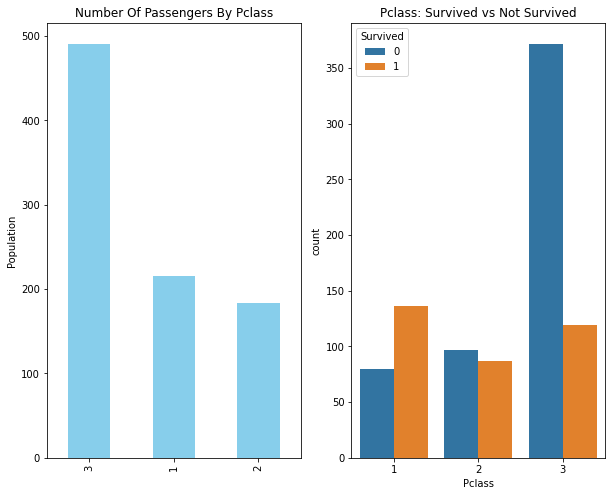

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10, 8))
titanic["Pclass"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Pclass")
ax[0].set_ylabel("Population")
sns.countplot("Pclass", hue = "Survived", data = titanic, ax = ax[1])
ax[1].set_title("Pclass: Survived vs Not Survived")
plt.show()

<h4 style="color:Red;"> The above charts show that the total number of passengers in Pclass 3 was the highest and many did not survive. In Pclass 2 the number of dead is higher than the number of survivors . However, in Pclass 1 more passengers survived than died.</h4>

<h4 style="color:Red;"> Next, let's see survivals by port of embarkment</h4>

In [ ]:
# First, replace the two missing values in the Embarked column with "S"
titanic["Embarked"] = titanic["Embarked"].fillna("S")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<h4 style="color:Red;"> Next, let's see passengers' age distribution</h4>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


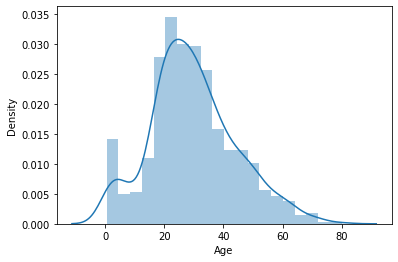

In [ ]:
# First, let's drop rows where age is missing, then create probability distribution chart
sns.distplot(titanic['Age'].dropna())

<h4 style="color:Red;"> Now let's do multivariate analysis of titanic data set to see survival (Survived) by Pclass, Fare and Age. </h4>

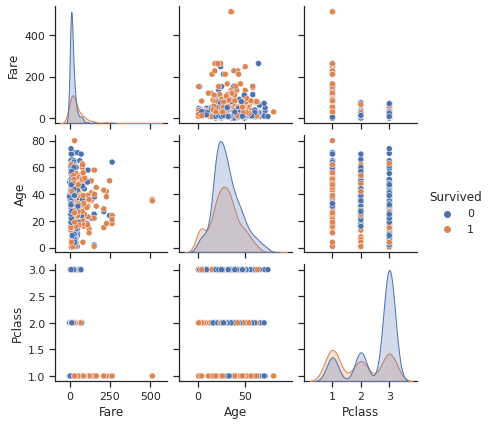

In [ ]:

sns.set(style="ticks", color_codes=True)
sns.pairplot(titanic,height=2,vars = [ 'Fare','Age','Pclass'], hue="Survived")
plt.show()


<h4 style="color:Red;"> Now let's create scatter plots to see survival by Age, Fare, passenger class, gender. </h4>

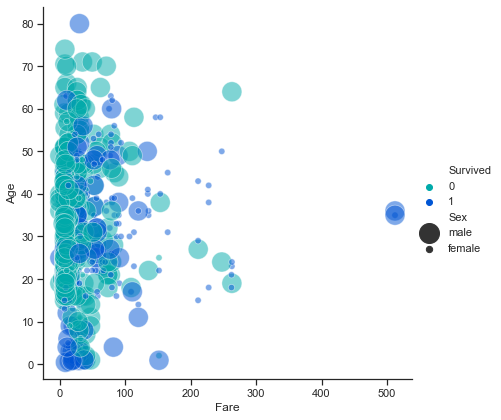

In [ ]:
sns.relplot(x="Fare", y="Age", hue="Survived", size="Sex",
            sizes=(40, 400), alpha=.5, palette="winter_r",
            height=6, data=titanic)

<AxesSubplot:xlabel='Fare', ylabel='Age'>

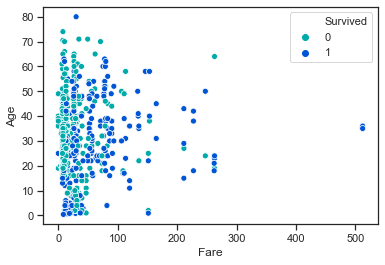

In [ ]:
sns.scatterplot(data=titanic, x="Fare", y="Age", hue="Survived", palette="winter_r")


<AxesSubplot:xlabel='Age', ylabel='Fare'>

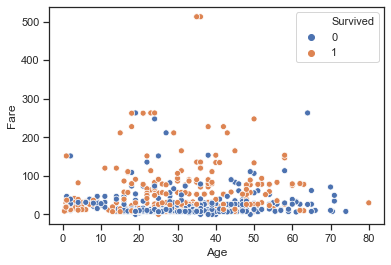

In [ ]:
sns.scatterplot(x = "Age", y = "Fare", data = titanic, hue = "Survived")

<h2 style="color:Red;">Now lets' create a correlation table and correlation heatmap</h2>

In [ ]:
# Remove the ID column
titanic2 = titanic[["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare","Embarked"]]

# Map the strings in the Embark column to numbers so we can include this field in correlation analysis
titanic2['Embarked'] = titanic['Embarked'].map({"S":1, "C":2,"Q":2,"NaN":0})
# Create a correlation table
titanic_corr = titanic2.corr(method='pearson')
titanic_corr

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,NaN
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,NaN
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,NaN
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,NaN
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,NaN
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,NaN
Embarked,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h4 style="color:Red;">A coefficient close to 1 means that there’s a very strong correlation between the two variables. The diagonal line shows  correlation of the variables to themselves — so the correlation coefficients on the diagonal are 1, meaning perfect corelation.</h4>

<AxesSubplot:>

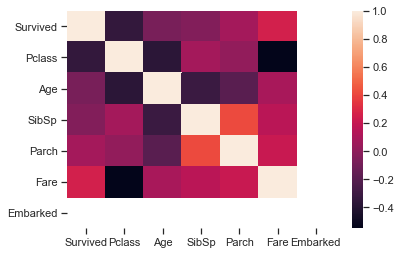

In [ ]:
# Create the heat map
sns.heatmap(titanic_corr,xticklabels=titanic_corr.columns,
            yticklabels=titanic_corr.columns)
          